<a href="https://colab.research.google.com/github/ynpreet/Game-Of-Thrones-Sentiment-Analysis-using-Twitter-data/blob/Colab-files/Game_of_thrones_twitter_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Of Thrones Sentiment Analysis using Twitter data

*Author: Preet Mehta*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraties
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis of Text Data
  * The most popular character
  * Wordcloud
7. Sentiment Analysis
8. Conclusion


<h4 align="center"></h4> 
<style>
img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
</style>
<img src = "https://livewallpaperhd.com/wp-content/uploads/2019/03/Wallpaper-HD-Game-of-Thrones-8-Season.jpg", width="800px",style="vertical-align:middle">

Some cool tips for improving google colab experience:

function KeepClicking(){ 
console.log("Clicking"); 
document.querySelector("colab-connect-button").click() 
} 
setInterval(KeepClicking,60000) 

### Winter is Coming!

---

Let's load the dataset ASAP!
If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin.

>### **1- Importing dataset ditectly from kaggle**
---

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Data/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Data/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import files
files.upload()
#upload your kaggle credentials json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"preetmehta","key":"b00dc6e3cec837e7cd72121758814d04"}'}

In [ ]:
#creating a directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
# Providing permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18158  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10859  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5456  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3884  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
#Downloading game of thrones twitter dataset
!kaggle datasets download -d monogenea/game-of-thrones-twitter

 92% 178M/194M [00:03<00:00, 55.8MB/s]
100% 194M/194M [00:03<00:00, 58.2MB/s]


In [ ]:
!unzip '/content/game-of-thrones-twitter.zip'

Archive:  /content/game-of-thrones-twitter.zip
  inflating: gotTwitter.csv          
  inflating: harvest.R               
  inflating: processing.R            


>### **2- Importing libraries**
---

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [ ]:
#removing stop words
from nltk.corpus import stopwords
import nltk
!pip install stop_words
from stop_words import get_stop_words
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

>### **3- Importing dataset**
---

In [ ]:
#imporing dataset
df=pd.read_csv('/content/gotTwitter.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,...,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x51554079,x1118417386150014976,2019-04-17 07:34:18,moevazquez,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown!...,IFTTT,99,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://youtu.be/8YuXkI1xucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11184173...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...
1,x51554079,x1117994592136249344,2019-04-16 03:34:16,moevazquez,👍 on @YouTube: Ups and Downs From Game Of Thro...,IFTTT,77,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179945...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...
2,x51554079,x1117987511391981568,2019-04-16 03:06:08,moevazquez,Liked on YouTube: Ups and Downs From Game Of T...,IFTTT,80,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179875...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...
3,x51554079,x1118410676475760640,2019-04-17 07:07:38,moevazquez,Liked on YouTube: GAME OF THRONES 8x01 Breakdo...,IFTTT,102,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://youtu.be/8YuXkI1xucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# chars = ("jon", "cersei", "sansa", "arya",
#               "bran", "tyrion", "jaime", "daenerys",
#               "hound", "davos", "missandei", "theon",
#               "brienne", "gendry", "grey_worm", "jorah",
#               "night_king", "varys", "melisandre", "tormund")
# char_counts = {}
# for char in chars:
#   char_counts[chars] = 0

>### **4- Basic Text Data Pre-processing**
---

In [ ]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(760660, 88)
user_id                   object
status_id                 object
created_at                object
screen_name               object
text                      object
                           ...  
profile_expanded_url      object
account_lang              object
profile_banner_url        object
profile_background_url    object
profile_image_url         object
Length: 88, dtype: object


In [ ]:
# selecting numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['display_text_width' 'favorite_count' 'retweet_count' 'ext_media_type'
 'quoted_favorite_count' 'quoted_retweet_count' 'quoted_followers_count'
 'quoted_friends_count' 'quoted_statuses_count' 'retweet_status_id'
 'retweet_text' 'retweet_created_at' 'retweet_source'
 'retweet_favorite_count' 'retweet_retweet_count' 'retweet_user_id'
 'retweet_screen_name' 'retweet_name' 'retweet_followers_count'
 'retweet_friends_count' 'retweet_statuses_count' 'retweet_location'
 'retweet_description' 'retweet_verified' 'followers_count'
 'friends_count' 'listed_count' 'statuses_count' 'favourites_count']


In [ ]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['user_id' 'status_id' 'created_at' 'screen_name' 'text' 'source'
 'reply_to_status_id' 'reply_to_user_id' 'reply_to_screen_name' 'is_quote'
 'is_retweet' 'hashtags' 'symbols' 'urls_url' 'urls_t.co'
 'urls_expanded_url' 'media_url' 'media_t.co' 'media_expanded_url'
 'media_type' 'ext_media_url' 'ext_media_t.co' 'ext_media_expanded_url'
 'mentions_user_id' 'mentions_screen_name' 'lang' 'quoted_status_id'
 'quoted_text' 'quoted_created_at' 'quoted_source' 'quoted_user_id'
 'quoted_screen_name' 'quoted_name' 'quoted_location' 'quoted_description'
 'quoted_verified' 'place_url' 'place_name' 'place_full_name' 'place_type'
 'country' 'country_code' 'geo_coords' 'coords_coords' 'bbox_coords'
 'status_url' 'name' 'location' 'description' 'url' 'protected'
 'account_created_at' 'verified' 'profile_url' 'profile_expanded_url'
 'account_lang' 'profile_banner_url' 'profile_background_url'
 'profile_image_url']


In [ ]:
#Checking null values in each column
df.isnull().sum()

user_id                        0
status_id                      0
created_at                     0
screen_name                    0
text                           0
                           ...  
profile_expanded_url      388713
account_lang                   0
profile_banner_url         61522
profile_background_url    108729
profile_image_url              1
Length: 88, dtype: int64

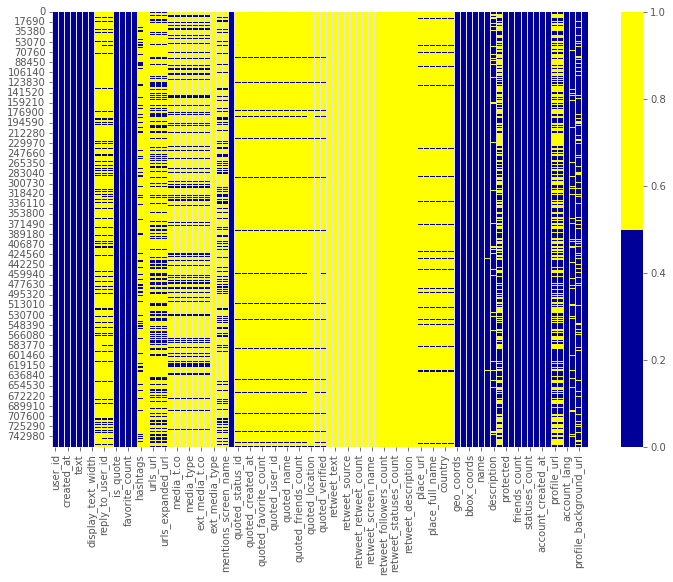

In [ ]:
#Missing Data Heatmap
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# Calculating % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if round(pct_missing*100)>0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

reply_to_status_id - 87%
reply_to_user_id - 86%
reply_to_screen_name - 86%
hashtags - 84%
symbols - 100%
urls_url - 67%
urls_t.co - 67%
urls_expanded_url - 67%
media_url - 85%
media_t.co - 85%
media_expanded_url - 85%
media_type - 85%
ext_media_url - 85%
ext_media_t.co - 85%
ext_media_expanded_url - 85%
ext_media_type - 100%
mentions_user_id - 79%
mentions_screen_name - 79%
quoted_status_id - 97%
quoted_text - 97%
quoted_created_at - 97%
quoted_source - 97%
quoted_favorite_count - 97%
quoted_retweet_count - 97%
quoted_user_id - 97%
quoted_screen_name - 97%
quoted_name - 97%
quoted_followers_count - 97%
quoted_friends_count - 97%
quoted_statuses_count - 97%
quoted_location - 98%
quoted_description - 97%
quoted_verified - 97%
retweet_status_id - 100%
retweet_text - 100%
retweet_created_at - 100%
retweet_source - 100%
retweet_favorite_count - 100%
retweet_retweet_count - 100%
retweet_user_id - 100%
retweet_screen_name - 100%
retweet_name - 100%
retweet_followers_count - 100%
retweet_frien

created missing indicator for: reply_to_status_id
created missing indicator for: reply_to_user_id
created missing indicator for: reply_to_screen_name
created missing indicator for: hashtags
created missing indicator for: symbols
created missing indicator for: urls_url
created missing indicator for: urls_t.co
created missing indicator for: urls_expanded_url
created missing indicator for: media_url
created missing indicator for: media_t.co
created missing indicator for: media_expanded_url
created missing indicator for: media_type
created missing indicator for: ext_media_url
created missing indicator for: ext_media_t.co
created missing indicator for: ext_media_expanded_url
created missing indicator for: ext_media_type
created missing indicator for: mentions_user_id
created missing indicator for: mentions_screen_name
created missing indicator for: quoted_status_id
created missing indicator for: quoted_text
created missing indicator for: quoted_created_at
created missing indicator for: quot

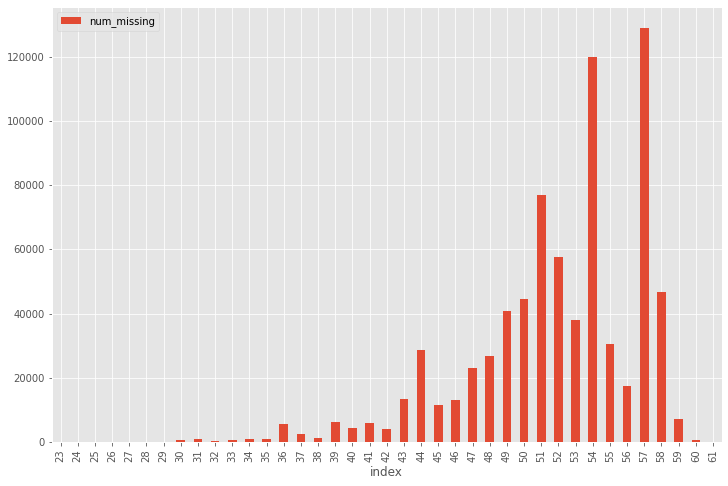

In [ ]:
col=df.columns
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [ ]:
#Dropping the unwanted features and observations
#Deleting all the features that are 100% blank
df.dropna(thresh=df.shape[0]*0.9,how='all',axis=1,inplace=True)
df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'lang', 'geo_coords', 'coords_coords', 'bbox_coords',
       'status_url', 'name', 'location', 'description', 'protected',
       'followers_count', 'friends_count', 'listed_count', 'statuses_count',
       'favourites_count', 'account_created_at', 'verified', 'account_lang',
       'profile_banner_url', 'profile_image_url'],
      dtype='object')

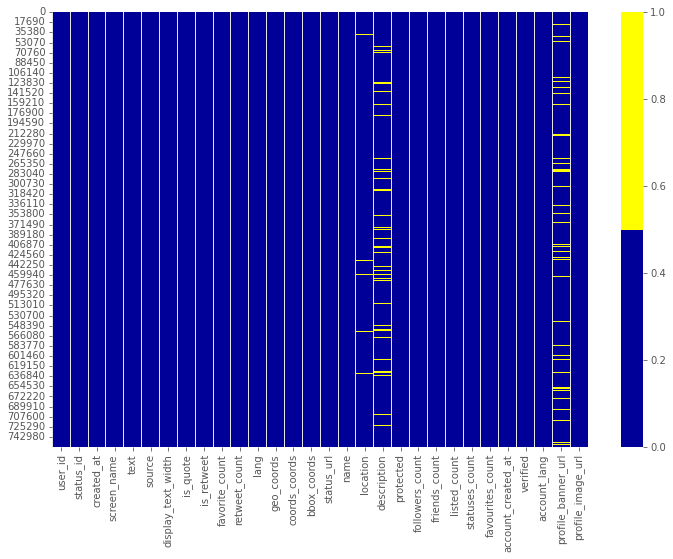

In [ ]:
#Now again checking Missing Data Heatmap
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

user_id - 0%
status_id - 0%
created_at - 0%
screen_name - 0%
text - 0%
source - 0%
display_text_width - 0%
is_quote - 0%
is_retweet - 0%
favorite_count - 0%
retweet_count - 0%
lang - 0%
geo_coords - 0%
coords_coords - 0%
bbox_coords - 0%
status_url - 0%
name - 0%
location - 1%
description - 7%
protected - 0%
followers_count - 0%
friends_count - 0%
listed_count - 0%
statuses_count - 0%
favourites_count - 0%
account_created_at - 0%
verified - 0%
account_lang - 0%
profile_banner_url - 8%
profile_image_url - 0%


> ### **5- Preparing Data for Exploratory Data Analysis (EDA) of text data**

In [ ]:
#lower casing the text column
df['cleaned']=df["text"].apply(lambda x: x.lower())

In [ ]:
#tringwithoutlink https://
import re
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('http://\S+|https://\S+', '',x))

In [ ]:
#removing digits
import re
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x)) 

In [ ]:
#removing punctuations
import string  
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
#removing line breaks
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\n', ' ', x))
# df['cleaned']=df['cleaned'].replace('\n', ' ').replace('\r', '')

In [ ]:
#stringwithouthash
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(r'#\w+ ?', '',x))

In [ ]:
df

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,...,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,cleaned
0,x51554079,x1118417386150014976,2019-04-17 07:34:18,moevazquez,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown!...,IFTTT,99,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://youtu.be/8YuXkI1xucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11184173...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube game of thrones breakdown night ...
1,x51554079,x1117994592136249344,2019-04-16 03:34:16,moevazquez,👍 on @YouTube: Ups and Downs From Game Of Thro...,IFTTT,77,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179945...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube ups and downs from game of thrones
2,x51554079,x1117987511391981568,2019-04-16 03:06:08,moevazquez,Liked on YouTube: Ups and Downs From Game Of T...,IFTTT,80,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179875...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,liked on youtube ups and downs from game of th...
3,x51554079,x1118410676475760640,2019-04-17 07:07:38,moevazquez,Liked on YouTube: GAME OF THRONES 8x01 Breakdo...,IFTTT,102,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://y

In [ ]:
#Note: This step might take more than 2.5 hours

# Importing spacy
import spacy

# Loading model
#nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
#Here I have selected 20 main characters of game of thrones
chars = ["jon", "cersei", "sansa", "arya",
              "bran", "tyrion", "jaime", "daenerys",
              "hound", "davos", "missandei", "theon",
              "brienne", "gendry", "grey worm", "jorah",
              "night king", "varys", "melisandre", "tormund"]

char_counts = {}
for char in chars:
  char_counts[char] = 0

In [ ]:
nltk.download('stopwords')
    # stop=set(stopwords.words('english'))
stop_words = get_stop_words('english')
stop_words.extend(['said','Is','A','TO','With','The','IN','For','To','From','THE','literally','havent','fucking','fucking','hey','hey ','episode', 'episode ', 'cant', 'cant ','hbo','watching','watched','im','honestly','omg','excited'
  ,'Are','Its','OF','Over','Up','After','I','On','In','in','i','l','L','New','Says',"tweet", "youtube", "throne", "gameofthrones", "throne","thrones", "watching", "lol", "fan", "thanks", "year", "seen", "social", "medium", "getting",
"coffee", "cup", "really", "cant", "someone", "finale", "ended", "everything", "anyone", "via", "fuck", "amp", "character", "writer", "competent", "itu2019s",
"2019","2018", "hbo", "actually",'Get','Get','INTO','Seen','Still','More','Gets','C','Say','Seen','Now','One','Top','His','Home','Into','Has','Can','End','Back','Said','Not','BRIEFS','Off','Not','M','Set','Out','Key',"the","of","to","and","a","in","is","it","you","that","he","was","for","on","are","with","as","I","his","they","be","at","one","have","this","from","or","had","by","hot","word","but","what","some","we","can","out","other","were","all","there","when","up","use","your","how","said","an","each","she","which","do","their","time","if","will","way","about","many","then","them","write","would","like","so","these","her","long","make","thing","see","him","two","has","look","more","day","could","go","come","did","number","sound","no","most","people","my","over","know","water","than","call","first","who","may","down","side","been","now","find","any","new","work","part","take","get","place","made","live","where","after","back","little","only","round","man","year","came","show","every","good","me","give","our","under","name","very","through","just","form","sentence","great","think","say","help","low","line","differ","turn","cause","much","mean","before","move","right","boy","old","too","same","tell","does","set","three","want","air","well","also","play","small","end","put","home","read","hand","port","large","spell","add","even","land","here","must","big","high","such","follow","act","why","ask","men","change","went","light","kind","off","need","house","picture","try","us","again","animal","point","mother","world","near","build","self","earth","father","head","stand","own","page","should","country","found","answer","school","grow","study","still","learn","plant","cover","food","sun","four","between","state","keep","eye","never","last","let","thought","city","tree","cross","farm","hard","start","might","story","saw","far","sea","draw","left","late","run","don\'t","while","press","close","night","real","life","few","north","open","seem","together","next","white","children","begin","got","walk","example","ease","paper","group","always","music","those","both","mark","often","letter","until","mile","river","car","feet","care","second","book","carry","took","science","eat","room","friend","began","idea","fish","mountain","stop","once","base","hear","horse","cut","sure","watch","color","face","wood","main","enough","plain","girl","usual","young","ready","above","ever","red","list","though","feel","talk","bird","soon","body","dog","family","direct","pose","leave","song","measure","door","product","black","short","numeral","class","wind","question","happen","complete","ship","area","half","rock","order","fire","south","problem","piece","told","knew","pass","since","top","whole","king","space","heard","best","hour","better","true","during","hundred","five","remember","step","early","hold","west","ground","interest","reach","fast","verb","sing","listen","six","table","travel","less","morning","ten","simple","several","vowel","toward","war","lay","against","pattern","slow","center","love","person","money","serve","appear","road","map","rain","rule","govern","pull","cold","notice","voice","unit","power","town","fine","certain","fly","fall","lead","cry","dark","machine","note","wait","plan","figure","star","box","noun","field","rest","correct","able","pound","done","beauty","drive","stood","contain","front","teach","week","final","gave","green","oh","quick","develop","ocean","warm","free","minute","strong","special","mind","behind","clear","tail","produce","fact","street","inch","multiply","nothing","course","stay","wheel","full","force","blue","object","decide","surface","deep","moon","island","foot","system","busy","test","record","boat","common","gold","possible","plane","stead","dry","wonder","laugh","thousand","ago","ran","check","game","shape","equate","hot","miss","brought","heat","snow","tire","bring","yes","distant","fill","east","paint","language","among","grand","ball","yet","wave","drop","heart","am","present","heavy","dance","engine","position","arm","wide","sail","material","size","vary","settle","speak","weight","general","ice","matter","circle","pair","include","divide","syllable","felt","perhaps","pick","sudden","count","square","reason","length","represent","art","subject","region","energy","hunt","probable","bed","brother","egg","ride","cell","believe","fraction","forest","sit","race","window","store","summer","train","sleep","prove","lone","leg","exercise","wall","catch","mount","wish","sky","board","joy","winter","sat","written","wild","instrument","kept","glass","grass","cow","job","edge","sign","visit","past","soft","fun","bright","gas","weather","month","million","bear","finish","happy","hope","flower","clothe","strange","gone","jump","baby","eight","village","meet","root","buy","raise","solve","metal","whether","push","seven","paragraph","third","shall","held","hair","describe","cook","floor","either","result","burn","hill","safe","cat","century","consider","type","law","bit","coast","copy","phrase","silent","tall","sand","soil","roll","temperature","finger","industry","value","fight","lie","beat","excite","natural","view","sense","ear","else","quite","broke","case","middle","kill","son","lake","moment","scale","loud","spring","observe","child","straight","consonant","nation","dictionary","milk","speed","method","organ","pay","age","section","dress","cloud","surprise","quiet","stone","tiny","climb","cool","design","poor","lot","experiment","bottom","key","iron","single","stick","flat","twenty","skin","smile","crease","hole","trade","melody","trip","office","receive","row","mouth","exact","symbol","die","least","trouble","shout","except","wrote","seed","tone","join","suggest","clean","break","lady","yard","rise","bad","blow","oil","blood","touch","grew","cent","mix","team","wire","cost","lost","brown","wear","garden","equal","sent","choose","fell","fit","flow","fair","bank","collect","save","control","decimal","gentle","woman","captain","practice","separate","difficult","doctor","please","protect","noon","whose","locate","ring","character","insect","caught","period","indicate","radio","spoke","atom","human","history","effect","electric","expect","crop","modern","element","hit","student","corner","party","supply","bone","rail","imagine","provide","agree","thus","capital","won't","chair","danger","fruit","rich","thick","soldier","process","operate","guess","necessary","sharp","wing","create","neighbor","wash","bat","rather","crowd","corn","compare","poem","string","bell","depend","meat","rub","tube","famous","dollar","stream","fear","sight","thin","triangle","planet","hurry","chief","colony","clock","mine","tie","enter","major","fresh","search","send","yellow","gun","allow","print","dead","spot","desert","suit","current","lift","rose","continue","block","chart","hat","sell","success","company","subtract","event","particular","deal","swim","term","opposite","wife","shoe","shoulder","spread","arrange","camp","invent","cotton","born","determine","quart","nine","truck","noise","level","chance","gather","shop","stretch","throw","shine","property","column","molecule","select","wrong","gray","repeat","require","broad","prepare","salt","nose","plural","anger","claim","continent","oxygen","sugar","death","pretty","skill","women","season","solution","magnet","silver","thank","branch","match","suffix","especially","fig","afraid","huge","sister","steel","discuss","forward","similar","guide","experience","score","apple","bought","led","pitch","coat","mass","card","band","rope","slip","win","dream","evening","condition","feed","tool","total","basic","smell","valley","nor","double","seat","arrive","master","track","parent","shore","division","sheet","substance","favor","connect","post","spend","chord","fat","glad","original","share","station","dad","bread","charge","proper","bar","offer","segment","slave","duck","instant","market","degree","populate","chick","dear","enemy","reply","drink","occur","support","speech","nature","range","steam","motion","path","liquid",'|',"log","meant","quotient","teeth","shell","neck"])
stop_words.append('said')
stop=stop_words
encodeings = []
def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for character in text:
            words=[w for w in word_tokenize(character) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>1]
            
  #Here we have inserted an encoder to count the Number of characters across the text
            encode = np.zeros(len(chars), dtype = int)
            for word in words:
              try:
                encode[chars.index(word)] += 1
                char_counts[word]+=1
              except:
                pass
            if 'night king' in character:
              encode[16] += 1
            if 'grey worm' in character:
              encode[14] += 1
            encodeings.append(encode)
            corpus.append(words)
        return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['lemmatized_new']=_preprocess_text(df['lemmatized'])

In [ ]:
#The lemmatized columns is now ready:)
df.head()

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,...,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,cleaned,lemmetized
0,0,x51554079,x1118417386150014976,2019-04-17 07:34:18,moevazquez,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown!...,IFTTT,99,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://youtu.be/8YuXkI1xucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11184173...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube game of thrones breakdown night ...,"['youtube', 'throne', 'breakdown', 'explained']"
1,1,x51554079,x1117994592136249344,2019-04-16 03:34:16,moevazquez,👍 on @YouTube: Ups and Downs From Game Of Thro...,IFTTT,77,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179945...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube ups and downs from game of thrones,"['youtube', 'ups', 'down', 'throne']"
2,2,x51554079,x1117987511391981568,2019-04-16 03:06:08,moevazquez,Liked on YouTube: Ups and Downs From Game Of T...,IFTTT,80,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179875...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,liked on youtube ups and downs from game of th...,"['liked', 'youtube', 'ups', 'down', 'throne']"
3,3,x51554079,x1118410676475760640,2019-04-17 07:07:38,moevazquez,Liked on YouTube: GAME OF THRONES 8x01 Breakdo...,IFT

In [ ]:
#We had count the characters (encoding) along with the lemmatization
df_encodings = pd.DataFrame(encodeings, columns= chars)
df_encodings=df_encodings[:760660]
df_encodings.head()

,Unnamed: 0,jon,cersei,sansa,arya,bran,tyrion,jaime,daenerys,hound,davos,missandei,theon,brienne,gendry,grey worm,jorah,night king,varys,melisandre,tormund
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> ### **6- Exploratory data analysis**

In [ ]:
corr = df_encodings.corr()

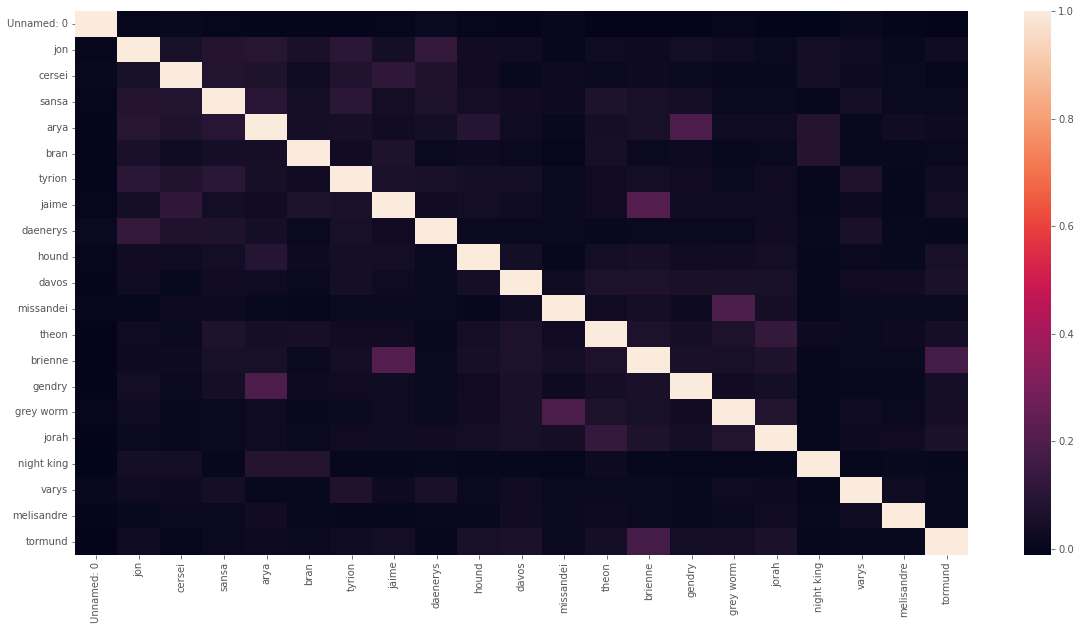

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

> ### **The most popular character - Arya Stark**

*Arya Stark is a fan favorite and total badass. She is an easy character type to get behind. She's a rebellious tomboy who goes against her society's gender norms. It's not hard to love a a character like that*
---

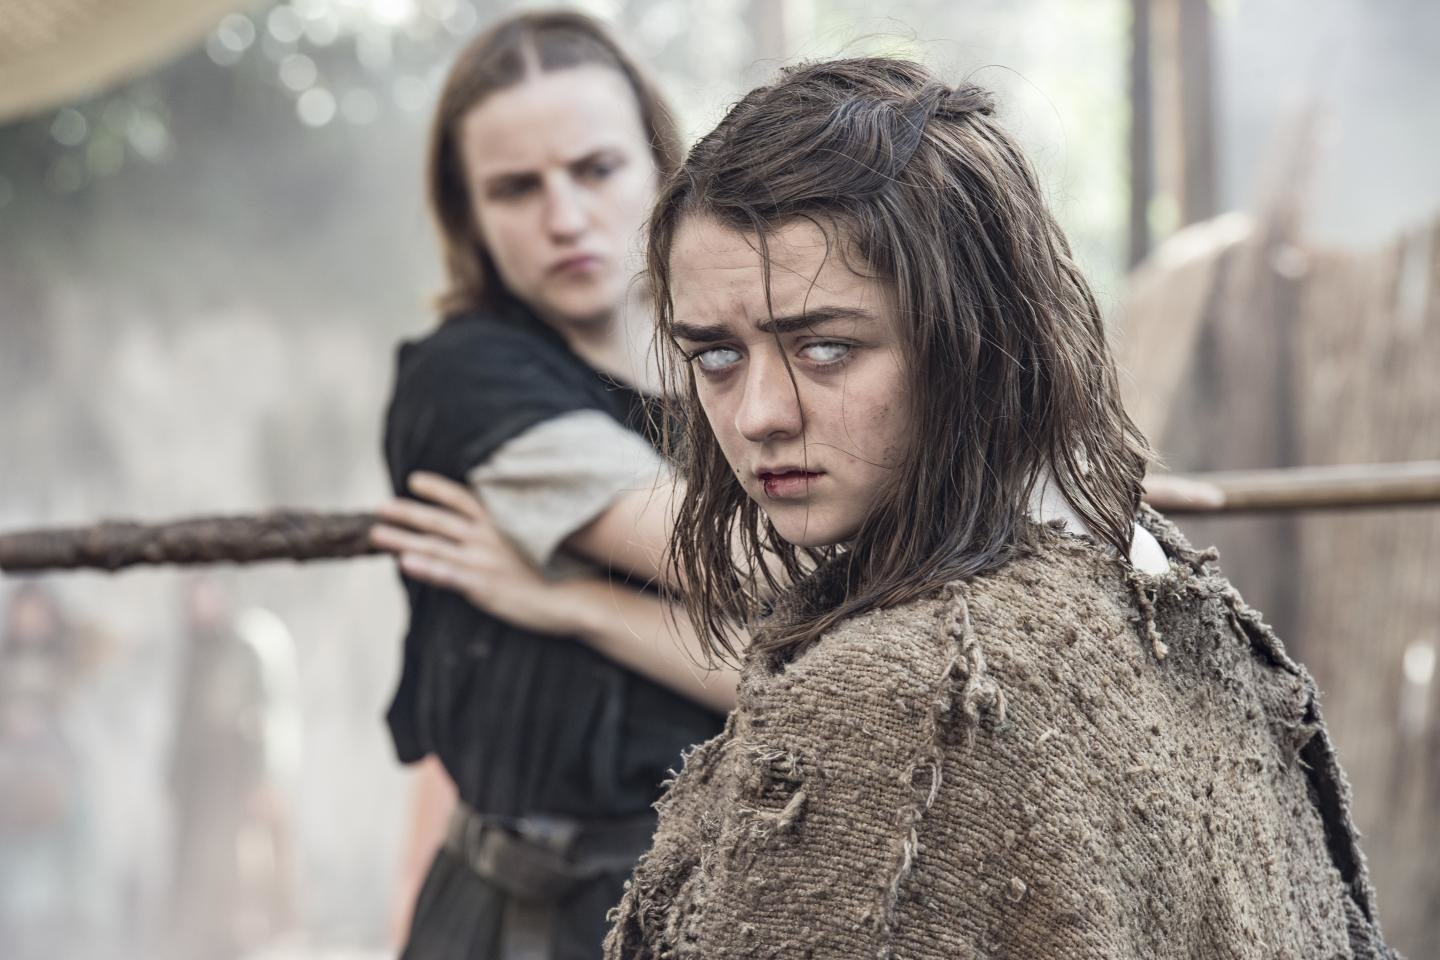

In [ ]:
df_encodings = df_encodings.iloc[: , 1:]
from os import name
temps = []
for column_name in df_encodings:
    column = df_encodings[column_name]
    count_of_non_zeros = (column != 0).sum()
    temps.append(count_of_non_zeros)
  # _, freqs = np.unique(frames[frames[char] != 0]['Analysis'].to_numpy(), return_counts = True)
   
df_freqs = pd.DataFrame(temps, columns = ['Count'], index = chars).sort_values('Count',ascending=False)

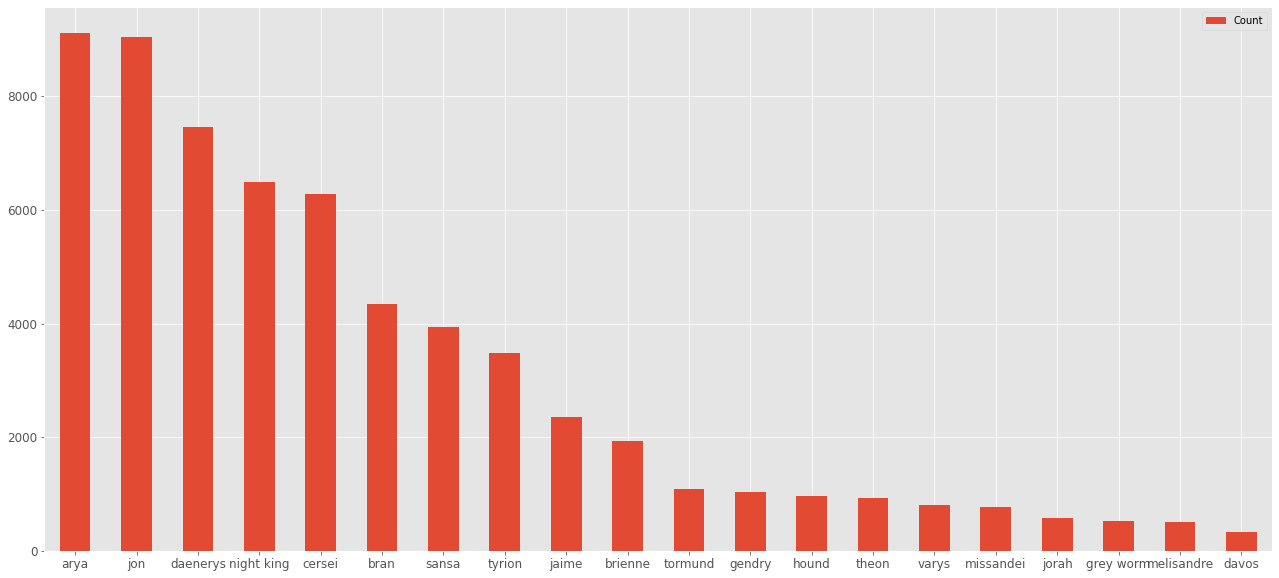

In [ ]:
ax = df_freqs.plot.bar(rot=0,figsize=(22,10),legend=True, fontsize=12)

> ### **Generating word cloud**
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
!pip install stop_words
from stop_words import get_stop_words

def plot_wordcloud(text):
    nltk.download('stopwords')
    # stop=set(stopwords.words('english'))
    stop_words = get_stop_words('english')
    stop_words.extend(['said','Is','A','TO','With','The','IN','For','To','From','THE'
  ,'Are','Its','OF','Over','Up','After','I','On','In','in','i','l','L','New','Says','tweet', 'youtube', 'throne', 'gameofthrones', 'throne','thrones', "watching", "lol", "fan", "thanks", "year", 'seen', 'social', 'medium', 'getting',
'coffee', 'cup', 'really','throne throne','episode throne','watching throne','throne fan','you tube', "cant", "someone", "finale", "ended", "everything", "anyone", "via", "fuck", "amp", "character", "writer", "competent", "itu2019s",
"2019","2018", "hbo", "actually", 'Get','Get','INTO','Seen','Still','More','Gets','C','Say','Seen','Now','One','Top','His','Home','Into','Has','Can','End','Back','Said','Not','BRIEFS','Off','Not','M','Set','Out','Key',"the","of","to","and","a","in","is","it","you","that","he","was","for","on","are","with","as","I","his","they","be","at","one","have","this","from","or","had","by","hot","word","but","what","some","we","can","out","other","were","all","there","when","up","use","your","how","said","an","each","she","which","do","their","time","if","will","way","about","many","then","them","write","would","like","so","these","her","long","make","thing","see","him","two","has","look","more","day","could","go","come","did","number","sound","no","most","people","my","over","know","water","than","call","first","who","may","down","side","been","now","find","any","new","work","part","take","get","place","made","live","where","after","back","little","only","round","man","year","came","show","every","good","me","give","our","under","name","very","through","just","form","sentence","great","think","say","help","low","line","differ","turn","cause","much","mean","before","move","right","boy","old","too","same","tell","does","set","three","want","air","well","also","play","small","end","put","home","read","hand","port","large","spell","add","even","land","here","must","big","high","such","follow","act","why","ask","men","change","went","light","kind","off","need","house","picture","try","us","again","animal","point","mother","world","near","build","self","earth","father","head","stand","own","page","should","country","found","answer","school","grow","study","still","learn","plant","cover","food","sun","four","between","state","keep","eye","never","last","let","thought","city","tree","cross","farm","hard","start","might","story","saw","far","sea","draw","left","late","run","don\'t","while","press","close","night","real","life","few","north","open","seem","together","next","white","children","begin","got","walk","example","ease","paper","group","always","music","those","both","mark","often","letter","until","mile","river","car","feet","care","second","book","carry","took","science","eat","room","friend","began","idea","fish","mountain","stop","once","base","hear","horse","cut","sure","watch","color","face","wood","main","enough","plain","girl","usual","young","ready","above","ever","red","list","though","feel","talk","bird","soon","body","dog","family","direct","pose","leave","song","measure","door","product","black","short","numeral","class","wind","question","happen","complete","ship","area","half","rock","order","fire","south","problem","piece","told","knew","pass","since","top","whole","king","space","heard","best","hour","better","true","during","hundred","five","remember","step","early","hold","west","ground","interest","reach","fast","verb","sing","listen","six","table","travel","less","morning","ten","simple","several","vowel","toward","war","lay","against","pattern","slow","center","love","person","money","serve","appear","road","map","rain","rule","govern","pull","cold","notice","voice","unit","power","town","fine","certain","fly","fall","lead","cry","dark","machine","note","wait","plan","figure","star","box","noun","field","rest","correct","able","pound","done","beauty","drive","stood","contain","front","teach","week","final","gave","green","oh","quick","develop","ocean","warm","free","minute","strong","special","mind","behind","clear","tail","produce","fact","street","inch","multiply","nothing","course","stay","wheel","full","force","blue","object","decide","surface","deep","moon","island","foot","system","busy","test","record","boat","common","gold","possible","plane","stead","dry","wonder","laugh","thousand","ago","ran","check","game","shape","equate","hot","miss","brought","heat","snow","tire","bring","yes","distant","fill","east","paint","language","among","grand","ball","yet","wave","drop","heart","am","present","heavy","dance","engine","position","arm","wide","sail","material","size","vary","settle","speak","weight","general","ice","matter","circle","pair","include","divide","syllable","felt","perhaps","pick","sudden","count","square","reason","length","represent","art","subject","region","energy","hunt","probable","bed","brother","egg","ride","cell","believe","fraction","forest","sit","race","window","store","summer","train","sleep","prove","lone","leg","exercise","wall","catch","mount","wish","sky","board","joy","winter","sat","written","wild","instrument","kept","glass","grass","cow","job","edge","sign","visit","past","soft","fun","bright","gas","weather","month","million","bear","finish","happy","hope","flower","clothe","strange","gone","jump","baby","eight","village","meet","root","buy","raise","solve","metal","whether","push","seven","paragraph","third","shall","held","hair","describe","cook","floor","either","result","burn","hill","safe","cat","century","consider","type","law","bit","coast","copy","phrase","silent","tall","sand","soil","roll","temperature","finger","industry","value","fight","lie","beat","excite","natural","view","sense","ear","else","quite","broke","case","middle","kill","son","lake","moment","scale","loud","spring","observe","child","straight","consonant","nation","dictionary","milk","speed","method","organ","pay","age","section","dress","cloud","surprise","quiet","stone","tiny","climb","cool","design","poor","lot","experiment","bottom","key","iron","single","stick","flat","twenty","skin","smile","crease","hole","trade","melody","trip","office","receive","row","mouth","exact","symbol","die","least","trouble","shout","except","wrote","seed","tone","join","suggest","clean","break","lady","yard","rise","bad","blow","oil","blood","touch","grew","cent","mix","team","wire","cost","lost","brown","wear","garden","equal","sent","choose","fell","fit","flow","fair","bank","collect","save","control","decimal","gentle","woman","captain","practice","separate","difficult","doctor","please","protect","noon","whose","locate","ring","character","insect","caught","period","indicate","radio","spoke","atom","human","history","effect","electric","expect","crop","modern","element","hit","student","corner","party","supply","bone","rail","imagine","provide","agree","thus","capital","won't","chair","danger","fruit","rich","thick","soldier","process","operate","guess","necessary","sharp","wing","create","neighbor","wash","bat","rather","crowd","corn","compare","poem","string","bell","depend","meat","rub","tube","famous","dollar","stream","fear","sight","thin","triangle","planet","hurry","chief","colony","clock","mine","tie","enter","major","fresh","search","send","yellow","gun","allow","print","dead","spot","desert","suit","current","lift","rose","continue","block","chart","hat","sell","success","company","subtract","event","particular","deal","swim","term","opposite","wife","shoe","shoulder","spread","arrange","camp","invent","cotton","born","determine","quart","nine","truck","noise","level","chance","gather","shop","stretch","throw","shine","property","column","molecule","select","wrong","gray","repeat","require","broad","prepare","salt","nose","plural","anger","claim","continent","oxygen","sugar","death","pretty","skill","women","season","solution","magnet","silver","thank","branch","match","suffix","especially","fig","afraid","huge","sister","steel","discuss","forward","similar","guide","experience","score","apple","bought","led","pitch","coat","mass","card","band","rope","slip","win","dream","evening","condition","feed","tool","total","basic","smell","valley","nor","double","seat","arrive","master","track","parent","shore","division","sheet","substance","favor","connect","post","spend","chord","fat","glad","original","share","station","dad","bread","charge","proper","bar","offer","segment","slave","duck","instant","market","degree","populate","chick","dear","enemy","reply","drink","occur","support","speech","nature","range","steam","motion","path","liquid",'|',"log","meant","quotient","teeth","shell","neck"])
    stop_words.append('said')
    stop=stop_words

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=9c1d79f6dacc1fe25d9460c639619aa9ab13cb6ff4f344df601c2cf987db1cf0
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab files/Gameofthroneskaggle/processed_csv.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


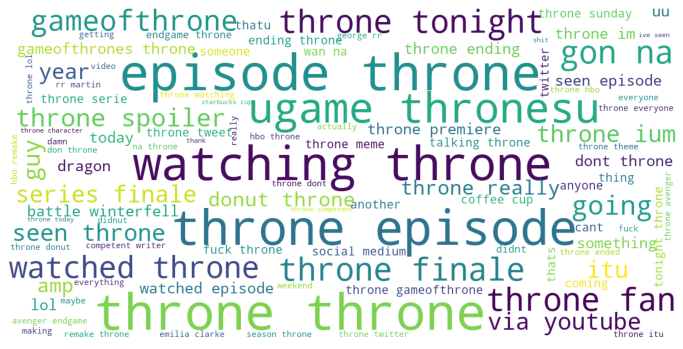

In [ ]:
df['lemmetized']=df['lemmetized'].map(str)
plot_wordcloud(df['lemmetized'])

In [ ]:
text = " ".join(cat.split()[0] for cat in df.lemmetized)

In [ ]:
stop_words = get_stop_words('english')
stop_words.extend(['said','Is','A','TO','With','The','IN','For','To','From','THE','ugame','ugame ',
'Are','Its','OF','Over','Up','After','I','On','In','in','i','l','L','New','Says','tweet', 'youtube', 'throne', 'gameofthrones', 'throne','thrones', "watching", "lol", "fan", "thanks", "year", 'seen', 'social', 'medium', 'getting',
'coffee', 'cup', 'really','throne throne','episode throne','watching throne','throne fan','you tube', "cant", "someone", "finale", "ended", "everything", "anyone", "via", "fuck", "amp", "character", "writer", "competent", "itu2019s",
"2019","2018", "hbo", "actually", 'Get','Get','INTO','Seen','Still','More','Gets','C','Say','Seen','Now','One','Top','His','Home','Into','Has','Can','End','Back','Said','Not','BRIEFS','Off','Not','M','Set','Out','Key',"the","of","to","and","a","in","is","it","you","that","he","was","for","on","are","with","as","I","his","they","be","at","one","have","this","from","or","had","by","hot","word","but","what","some","we","can","out","other","were","all","there","when","up","use","your","how","said","an","each","she","which","do","their","time","if","will","way","about","many","then","them","write","would","like","so","these","her","long","make","thing","see","him","two","has","look","more","day","could","go","come","did","number","sound","no","most","people","my","over","know","water","than","call","first","who","may","down","side","been","now","find","any","new","work","part","take","get","place","made","live","where","after","back","little","only","round","man","year","came","show","every","good","me","give","our","under","name","very","through","just","form","sentence","great","think","say","help","low","line","differ","turn","cause","much","mean","before","move","right","boy","old","too","same","tell","does","set","three","want","air","well","also","play","small","end","put","home","read","hand","port","large","spell","add","even","land","here","must","big","high","such","follow","act","why","ask","men","change","went","light","kind","off","need","house","picture","try","us","again","animal","point","mother","world","near","build","self","earth","father","head","stand","own","page","should","country","found","answer","school","grow","study","still","learn","plant","cover","food","sun","four","between","state","keep","eye","never","last","let","thought","city","tree","cross","farm","hard","start","might","story","saw","far","sea","draw","left","late","run","don\'t","while","press","close","night","real","life","few","north","open","seem","together","next","white","children","begin","got","walk","example","ease","paper","group","always","music","those","both","mark","often","letter","until","mile","river","car","feet","care","second","book","carry","took","science","eat","room","friend","began","idea","fish","mountain","stop","once","base","hear","horse","cut","sure","watch","color","face","wood","main","enough","plain","girl","usual","young","ready","above","ever","red","list","though","feel","talk","bird","soon","body","dog","family","direct","pose","leave","song","measure","door","product","black","short","numeral","class","wind","question","happen","complete","ship","area","half","rock","order","fire","south","problem","piece","told","knew","pass","since","top","whole","king","space","heard","best","hour","better","true","during","hundred","five","remember","step","early","hold","west","ground","interest","reach","fast","verb","sing","listen","six","table","travel","less","morning","ten","simple","several","vowel","toward","war","lay","against","pattern","slow","center","love","person","money","serve","appear","road","map","rain","rule","govern","pull","cold","notice","voice","unit","power","town","fine","certain","fly","fall","lead","cry","dark","machine","note","wait","plan","figure","star","box","noun","field","rest","correct","able","pound","done","beauty","drive","stood","contain","front","teach","week","final","gave","green","oh","quick","develop","ocean","warm","free","minute","strong","special","mind","behind","clear","tail","produce","fact","street","inch","multiply","nothing","course","stay","wheel","full","force","blue","object","decide","surface","deep","moon","island","foot","system","busy","test","record","boat","common","gold","possible","plane","stead","dry","wonder","laugh","thousand","ago","ran","check","game","shape","equate","hot","miss","brought","heat","snow","tire","bring","yes","distant","fill","east","paint","language","among","grand","ball","yet","wave","drop","heart","am","present","heavy","dance","engine","position","arm","wide","sail","material","size","vary","settle","speak","weight","general","ice","matter","circle","pair","include","divide","syllable","felt","perhaps","pick","sudden","count","square","reason","length","represent","art","subject","region","energy","hunt","probable","bed","brother","egg","ride","cell","believe","fraction","forest","sit","race","window","store","summer","train","sleep","prove","lone","leg","exercise","wall","catch","mount","wish","sky","board","joy","winter","sat","written","wild","instrument","kept","glass","grass","cow","job","edge","sign","visit","past","soft","fun","bright","gas","weather","month","million","bear","finish","happy","hope","flower","clothe","strange","gone","jump","baby","eight","village","meet","root","buy","raise","solve","metal","whether","push","seven","paragraph","third","shall","held","hair","describe","cook","floor","either","result","burn","hill","safe","cat","century","consider","type","law","bit","coast","copy","phrase","silent","tall","sand","soil","roll","temperature","finger","industry","value","fight","lie","beat","excite","natural","view","sense","ear","else","quite","broke","case","middle","kill","son","lake","moment","scale","loud","spring","observe","child","straight","consonant","nation","dictionary","milk","speed","method","organ","pay","age","section","dress","cloud","surprise","quiet","stone","tiny","climb","cool","design","poor","lot","experiment","bottom","key","iron","single","stick","flat","twenty","skin","smile","crease","hole","trade","melody","trip","office","receive","row","mouth","exact","symbol","die","least","trouble","shout","except","wrote","seed","tone","join","suggest","clean","break","lady","yard","rise","bad","blow","oil","blood","touch","grew","cent","mix","team","wire","cost","lost","brown","wear","garden","equal","sent","choose","fell","fit","flow","fair","bank","collect","save","control","decimal","gentle","woman","captain","practice","separate","difficult","doctor","please","protect","noon","whose","locate","ring","character","insect","caught","period","indicate","radio","spoke","atom","human","history","effect","electric","expect","crop","modern","element","hit","student","corner","party","supply","bone","rail","imagine","provide","agree","thus","capital","won't","chair","danger","fruit","rich","thick","soldier","process","operate","guess","necessary","sharp","wing","create","neighbor","wash","bat","rather","crowd","corn","compare","poem","string","bell","depend","meat","rub","tube","famous","dollar","stream","fear","sight","thin","triangle","planet","hurry","chief","colony","clock","mine","tie","enter","major","fresh","search","send","yellow","gun","allow","print","dead","spot","desert","suit","current","lift","rose","continue","block","chart","hat","sell","success","company","subtract","event","particular","deal","swim","term","opposite","wife","shoe","shoulder","spread","arrange","camp","invent","cotton","born","determine","quart","nine","truck","noise","level","chance","gather","shop","stretch","throw","shine","property","column","molecule","select","wrong","gray","repeat","require","broad","prepare","salt","nose","plural","anger","claim","continent","oxygen","sugar","death","pretty","skill","women","season","solution","magnet","silver","thank","branch","match","suffix","especially","fig","afraid","huge","sister","steel","discuss","forward","similar","guide","experience","score","apple","bought","led","pitch","coat","mass","card","band","rope","slip","win","dream","evening","condition","feed","tool","total","basic","smell","valley","nor","double","seat","arrive","master","track","parent","shore","division","sheet","substance","favor","connect","post","spend","chord","fat","glad","original","share","station","dad","bread","charge","proper","bar","offer","segment","slave","duck","instant","market","degree","populate","chick","dear","enemy","reply","drink","occur","support","speech","nature","range","steam","motion","path","liquid",'|',"log","meant","quotient","teeth","shell","neck"])
stop_words.append('said')
stop=stop_words

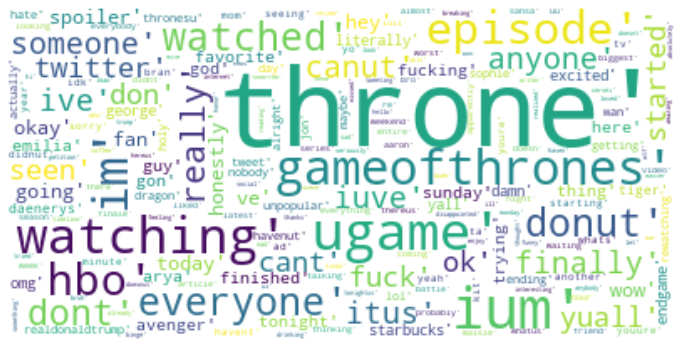

In [ ]:
from wordcloud import WordCloud
# stopwords = set(STOPWORDS)
# stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stop, background_color="white",collocations = False).generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

> ### **7- Sentiment analysis of characters**
---

In [ ]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df['Subjectivity'] = df['lemmatized'].apply(getSubjectivity) 
df['Polarity'] = df['lemmatized'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,...,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,cleaned,lemmatized,lemmatized_new,Subjectivity,Polarity,Analysis
0,x51554079,x1118417386150014976,2019-04-17 07:34:18,moevazquez,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown!...,IFTTT,99,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/8YuXkI1xucc,https://t.co/Ig8QyNPtkL,https://youtu.be/8YuXkI1xucc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11184173...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube game of thrones breakdown night ...,👍 youtube game throne breakdown night king s...,"[breakdown, explain]",0.400000,-0.400000,Negative
1,x51554079,x1117994592136249344,2019-04-16 03:34:16,moevazquez,👍 on @YouTube: Ups and Downs From Game Of Thro...,IFTTT,77,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x10228272,YouTube,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179945...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,👍 on youtube ups and downs from game of thrones,👍 youtube up down game throne,[],0.344444,-0.277778,Negative
2,x51554079,x1117987511391981568,2019-04-16 03:06:08,moevazquez,Liked on YouTube: Ups and Downs From Game Of T...,IFTTT,80,NaN,NaN,NaN,False,False,0,0,NaN,NaN,youtu.be/gAR3gbNXgf4,https://t.co/CZndqySpWS,https://youtu.be/gAR3gbNXgf4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/moevazquez/status/11179875...,lagoon monster,mexico city,darkness comes alive ...,https://t.co/UtWjeVMUCT,False,4497,4984,48,206478,36131,2009-06-27 20:58:25,False,https://t.co/UtWjeVMUCT,https://www.facebook.com/moisesvo,es,https://pbs.twimg.com/profile_banners/51554079...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/9788848932...,liked on youtube ups and downs from game of th...,like youtube up down game throne,[],0.344444,-0.277778,Negative
3,x51554079,x1118410676475760640,2019-04-17 07:07:38,moevazquez,Liked on YouTube: GAME 

In [ ]:
df2  = df.iloc[: , -3:]
frames=pd.concat([df2,df_encodings], axis=1)

In [ ]:
from os import name
temps = []
for char in chars:
  _, freqs = np.unique(frames[frames[char] != 0]['Analysis'].to_numpy(), return_counts = True)
  temps.append(freqs / sum(freqs))
df_freqs = pd.DataFrame(temps, columns = ['Negative', 'Neutral','Positive'], index = chars)

In [ ]:
df_freqs

,Negative,Neutral,Positive
jon,0.665819,0.102034,0.232147
cersei,0.588891,0.110138,0.300971
sansa,0.651788,0.092062,0.256150
arya,0.710884,0.063419,0.225697
bran,0.714614,0.076746,0.208640
tyrion,0.675668,0.079862,0.244470
jaime,0.624682,0.122137,0.253181
daenerys,0.670237,0.128263,0.201500
hound,0.627349,0.072025,0.300626
davos,0.637462,0.075529,0.287009


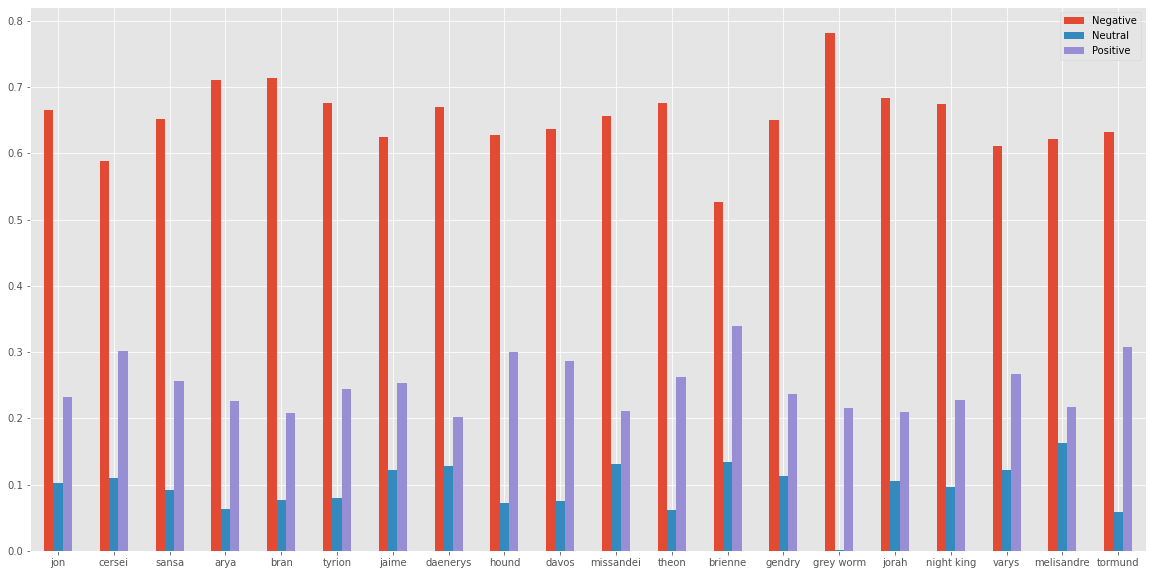

In [ ]:
ax = df_freqs.plot.bar(rot=0,figsize=(20, 10))
# figure(figsize=(20, 8), dpi=80)
# df_freqs.plot(figsize=(10,8))

> ### **8- Conclusion**
---

- Arya Stark is the most popular character is Game of thrones season 8 followed by Jon Snow, Daenerys Targaryen
- Brienne of Tarth was a fan-favorite character in Game of Thrones having the most positive reviews